In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Train mahalanobis features with entire training dataset

In [6]:
from utils.config import opt
from data.dataset import Dataset, TestDataset
from torch.utils.data import DataLoader

opt.voc_data_dir = "/media/tadenoud/DATADisk/datasets/kitti_2d/VOC2012/"
dataset = Dataset(opt)

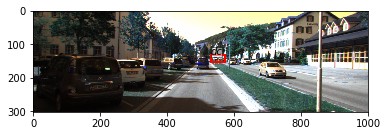

In [7]:
IMG_NUM = 18

img, bbox, label, scale = dataset[IMG_NUM]

from data.util import  read_image
from utils.vis_tool import vis_bbox

mean = np.array([122.7717, 115.9465, 102.9801]).reshape(3, 1, 1)

def unnormalize_img(img, mean=mean):
    return img + mean

from utils.class_labels import CLASS_LABELS

def filter_labels(bbox, label, keep_classes=['person', 'cyclist']):
    keep_classes = list(map(CLASS_LABELS.index, keep_classes))
    mask = [l == -1 or l in keep_classes for l in label]
    
    return bbox[mask], label[mask]


bbox, label = filter_labels(bbox, label)
vis_bbox(unnormalize_img(img), bbox, label)

In [8]:
from misc.filter_image_sets import create_filtered_img_set

In [11]:
print('Writing trainval')
create_filtered_img_set(opt.voc_data_dir, split='trainval', outfile='trainval.txt', use_difficult=False)
print('Writing train')
create_filtered_img_set(opt.voc_data_dir, split='train', outfile='train.txt', use_difficult=False)
print('Writing val')
create_filtered_img_set(opt.voc_data_dir, split='val', outfile='val.txt', use_difficult=False)
print('Writing test')
create_filtered_img_set(opt.voc_data_dir, split='test', outfile='test.txt', use_difficult=False)

Writing trainval
Writing train
Writing val
Writing test


In [15]:
with open("./train.txt", 'rb') as f:
    print("train_num", len(f.readlines()))
    
with open("./val.txt", 'rb') as f:
    print("test_num", len(f.readlines()))

train_num 3012
test_num 3185
